In [14]:
import wget
import pandas as pd
import numpy as np
from glob import glob
from pyvis.network import Network
from tqdm.notebook import tqdm
from IPython.display import display, Image

In [2]:
# Se decargan los datos del año 2022
for year in range(2022, 2023):
    for month in range(1, 13):
        file_name = f"{year}-{month}.zip"
        url = f"https://transparenciachc.blob.core.windows.net/oc-da/{file_name}"
        wget.download(url, f"data/{file_name}")

100% [....................................................] 96600317 / 96600317

In [2]:
# Se leen los archivos descargados y se pasan a un solo dataframe
files = glob("data/*")
n_files = len(files)
df = pd.DataFrame()
for index, file in enumerate(files):
    index += 1
    print(f">> {index} de {n_files} {file}")
    aux = pd.read_csv(
        file,
        compression="zip",
        encoding="latin-1",
        sep=";",
        low_memory=False,
    )
    df = pd.concat([df, aux], axis=0)
    del aux
    print(f"<  {index} de {n_files} {file}")

>> 1 de 12 data/2022-8.zip
<  1 de 12 data/2022-8.zip
>> 2 de 12 data/2022-12.zip
<  2 de 12 data/2022-12.zip
>> 3 de 12 data/2022-5.zip
<  3 de 12 data/2022-5.zip
>> 4 de 12 data/2022-2.zip
<  4 de 12 data/2022-2.zip
>> 5 de 12 data/2022-9.zip
<  5 de 12 data/2022-9.zip
>> 6 de 12 data/2022-7.zip
<  6 de 12 data/2022-7.zip
>> 7 de 12 data/2022-3.zip
<  7 de 12 data/2022-3.zip
>> 8 de 12 data/2022-1.zip
<  8 de 12 data/2022-1.zip
>> 9 de 12 data/2022-10.zip
<  9 de 12 data/2022-10.zip
>> 10 de 12 data/2022-4.zip
<  10 de 12 data/2022-4.zip
>> 11 de 12 data/2022-11.zip
<  11 de 12 data/2022-11.zip
>> 12 de 12 data/2022-6.zip
<  12 de 12 data/2022-6.zip


In [3]:
df

,ID,Codigo,Link,Nombre,Descripcion/Obervaciones,Tipo,ProcedenciaOC,EsTratoDirecto,EsCompraAgil,CodigoTipo,...,EspecificacionProveedor,cantidad,UnidadMedida,monedaItem,precioNeto,totalCargos,totalDescuentos,totalImpuestos,totalLineaNeto,Forma de Pago
0,34190694,2467-1613-SE17,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 2467-94-R117,"CAMARAS DE TELEVIGILANCIA, MUNIC. DE CHILLAN D...",SE,Proveniente de licitación pública,No,No,8,...,Propuesta técnica y económica instalación de c...,4,Unidad,CLP,6065675,0,0,0.0,24262700,30 dias contra la recepcion conforme de la fac...
1,41850398,3920-11-SE20,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 3920-4-LE20,REP.Y HABILITACION CUBIERTA MARQUESINA CANCHA ...,SE,Proveniente de licitación pública,No,No,8,...,REPARACIÓN Y HABILITACIÓN DE CUBIERTA MARQUESI...,1,Unidad,CLP,11933125,0,0,0.0,11933125,30 dias contra la recepcion conforme de la fac...
2,41884671,3920-12-SE20,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 3920-3-LE20,EMO 2019-REPARACION Y REPOSIC.DE INFRAESTRUCTU...,SE,Proveniente de licitación pública,No,No,8,...,\t\r\r\nEMO 2019-REPARACION Y REPOSIC.DE INFRA...,1,Unidad,CLP,36666250,0,0,0.0,36666250,30 dias contra la recepcion conforme de la fac...
3,42160120,3920-14-SE20,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 3920-10-LE20,MEJORAMIENTO DE SEGURIDAD VIAL PARA EL AREA UR...,SE,Proveniente de licitación pública,No,No,8,...,Oferta segun lo solicitado,1,Unidad,CLP,14243375,0,0,0.0,14243375,30 dias contra la recepcion conforme de la fac...
4,42283654,3920-15-SE20,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 3920-5-LP20,MEJ. CENTRO REHABILITACION INTEGRAL CLUDIVI DE...,SE,Proveniente de licitación pública,No,No,8,...,Propuesta Completa,1,Unidad,CLP,45882018,0,0,0.0,45882018,30 dias contra la recepcion conforme de la fac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374996,46174444,1057509-6080-SE22,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ADQ. SET PLACA FEMUR DISTAL(CN-NVS),ID 1057509-299-LP21\r\r\nPAC. J.BECERRA-C.ISLA...,SE,Proveniente de licitación pública,No,No,8,...,SET PLACA FEMUR DISTAL,1,Unidad no definida,CLP,4500000,0,0,0.0,4500000,30 dias contra la recepcion conforme de la fac...
374997,46174445,1057509-6081-SE22,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ADQ. SET PLACA RADIO DISTAL(CN-NVS),ID 1057509-123-LP21\r\r\nORDEN ANTICIPADA POR ...,SE,Proveniente de licitación pública,No,No,8,...,IMPLANTES SET PLACA RADIO DISTAL C/TORNILLOS Y...,1,Unidad no definida,CLP,27410578,0,0,0.0,27410578,30 dias contra la recepcion conforme de la fac...
374998,46174447,1057547-6751-SE22,http://www.mercadopublico.cl/PurchaseOrder/Mod...,MANTENCION EQUIPO GAMMAMED PLUS IX,"De acuerdo a resolución Exenta N°8138, CUOTA 5...",SE,Si solo existe un proveedor del bien o servicio,Si,No,8,...,MANTENCION EQUIPO GAMMAMED PLUS IX CUOTA 5/6,1,Unidad,CLP,16670773,0,0,0.0,16670773,30 dias contra la recepcion conforme de la fac...
374999,46174487,1057547-6753-SE22,http://www.mercadopublico.cl/PurchaseOrder/Mod...,ORDEN DE COMPRA DESDE 1057547-326-LE21,MANTENCION EQUIPOS ANATOMÍA PATOLÓGICA DESDE ...,SE,Proveniente de licitación pública,No,No,8,...,MICROSCOPIO MULTICABEZAL 5,1,Unidad,CLP,45000,0,0,0.0,45000,30 dias contra la recepcion conforme de la fac...


In [4]:
# Se dejan las columnas con las que se trabajara para la visualizacion de la red, se quitan duplicados y se formatean los datos
sub_df = df[["MontoTotalOC_PesosChilenos", "CodigoOrganismoPublico", "OrganismoPublico", "CodigoProveedor", "NombreProveedor"]]
sub_df = sub_df.dropna()

sub_df["MontoTotalOC_PesosChilenos"] = pd.to_numeric(sub_df["MontoTotalOC_PesosChilenos"].str.replace(',', '.'))
sub_df["CodigoOrganismoPublico"] = sub_df["CodigoOrganismoPublico"].astype(int)
sub_df["CodigoProveedor"] = sub_df["CodigoProveedor"].astype(int)
sub_df["OrganismoPublico"] = sub_df["OrganismoPublico"].str.title()
sub_df["NombreProveedor"] = sub_df["NombreProveedor"].str.title()

In [5]:
sub_df

,MontoTotalOC_PesosChilenos,CodigoOrganismoPublico,OrganismoPublico,CodigoProveedor,NombreProveedor
0,28872613.00,88254,I Municipalidad De Chillan,61184,M Y P Ltda.
1,14200418.75,118084,I Municipalidad De Villarrica,1589049,Ingeniería Y Construcción Del Sur Spa
2,43632837.50,118084,I Municipalidad De Villarrica,1293105,Adrian Zenon Leonelli Mora
3,16949616.25,118084,I Municipalidad De Villarrica,1569124,Gabriel
4,54599601.42,118084,I Municipalidad De Villarrica,1715060,"Constructora Del Lago, Juan Francisco Agnes Pu..."
...,...,...,...,...,...
374996,5355000.00,7042,Hospital Clinico Herminda Martin,24533,Importadora Helico Ltda
374997,32618587.82,7042,Hospital Clinico Herminda Martin,135817,Tecnomedical S A
374998,19838219.87,7410,Servicio De Salud Valdivia Hospital Base,40413,Ingenieria En Electronica Computa Cion Y Medi...
374999,329689.50,7410,Servicio De Salud Valdivia Hospital Base,1727501,Aillapán Mella Equipos Medicos Limitada


In [6]:
# Se crean diccionarios de los codigos
public_organizations_dict = sub_df[["CodigoOrganismoPublico", "OrganismoPublico"]].drop_duplicates().set_index("CodigoOrganismoPublico").to_dict(orient="dict")["OrganismoPublico"]
suppliers_dict = sub_df[["CodigoProveedor", "NombreProveedor"]].drop_duplicates().set_index("CodigoProveedor").to_dict(orient="dict")["NombreProveedor"]

In [7]:
# Se saca la suma de las ordenes de compra por organismo publico y proveedor
relations = sub_df.groupby(["CodigoOrganismoPublico", "CodigoProveedor"])["MontoTotalOC_PesosChilenos"].sum()
relations = relations.reset_index().sort_values(by="MontoTotalOC_PesosChilenos", ascending=False)
relations["cumsum_as_pct"] = relations["MontoTotalOC_PesosChilenos"].cumsum() / relations["MontoTotalOC_PesosChilenos"].sum()
# Se filtra el 50% del total de ordenes de compra
relations = relations[relations["cumsum_as_pct"] < 0.5]
relations = relations.drop(columns=["cumsum_as_pct"]).groupby(["CodigoOrganismoPublico", "CodigoProveedor"])["MontoTotalOC_PesosChilenos"].sum()
public_organizations = relations.groupby("CodigoOrganismoPublico").sum()
suppliers = relations.groupby("CodigoProveedor").sum()

In [8]:
# Se crea la red
net = Network(bgcolor="#00425A", font_color="white", cdn_resources="remote")

In [9]:
# Se agregan los nodos de organismos publicos
for public_organization_code, amount in tqdm(public_organizations.items(), total=public_organizations.shape[0]):
    net.add_node(f"po_{public_organization_code}", value=amount, title=public_organizations_dict[public_organization_code], label=public_organizations_dict[public_organization_code], color="#1F8A70")

  0%|          | 0/284 [00:00<?, ?it/s]

In [10]:
# Se agregan los nodos de proveedores
for supplier_code, amount in tqdm(suppliers.items(), total=suppliers.shape[0]):
    net.add_node(f"s_{supplier_code:.0f}", value=amount, title=suppliers_dict[supplier_code], label=suppliers_dict[supplier_code], color="#BFDB38")

  0%|          | 0/686 [00:00<?, ?it/s]

In [11]:
# Se agregan las conexiones entre organismos publicos y proveedors
for (public_organization_code, supplier_code), amount in tqdm(relations.items(), total=relations.shape[0]):
    net.add_edge(f"po_{public_organization_code}", f"s_{supplier_code:.0f}", value=amount)

  0%|          | 0/1082 [00:00<?, ?it/s]

In [12]:
# Se agrega el listado de proveedores o compradores por nodo
neighbor_map = net.get_adj_list()

for node in net.nodes:
    if node["id"].startswith("po_"):
        node_suppliers = [suppliers_dict[int(x[2:])] for x in neighbor_map[node["id"]]]
        node["title"] += f"\n\nPROVEEDORES:\n" + "\n".join(node_suppliers)
    else:
        node_buyers = [public_organizations_dict[int(x[3:])] for x in neighbor_map[node["id"]]]
        node["title"] += f" :\n\nCOMPRADORES:\n" + "\n".join(node_buyers)

In [13]:
# Se muestra la visualizacion
net.force_atlas_2based()
net.show("Mercado publico.html")

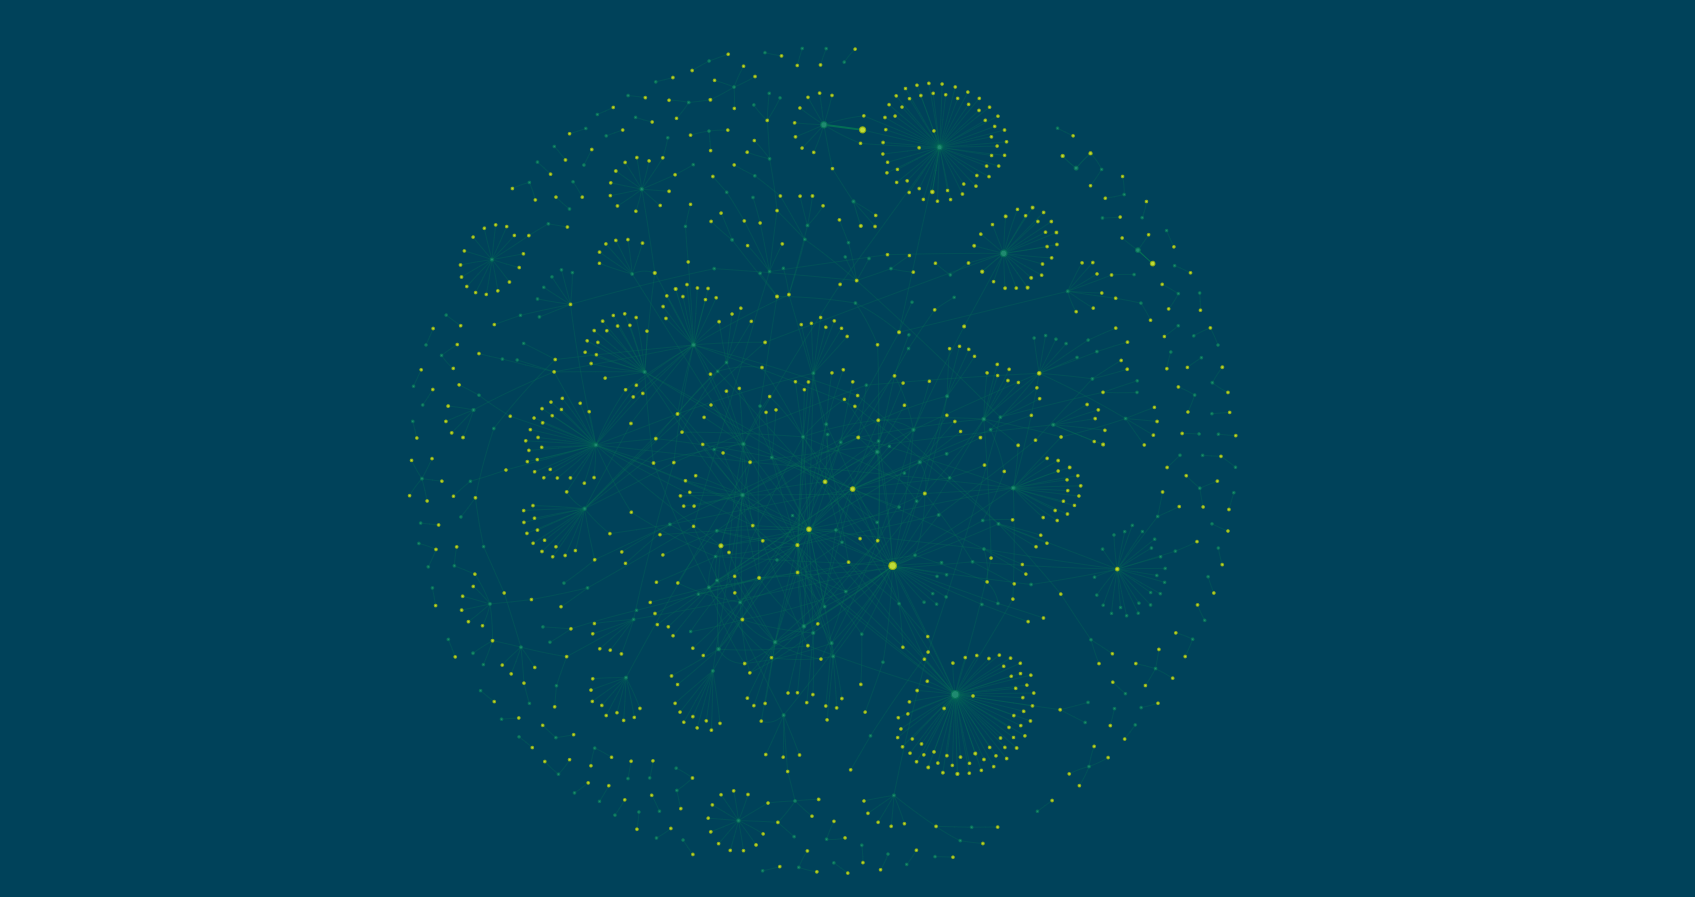

In [18]:
display(Image(filename='screenshots/1.png'))

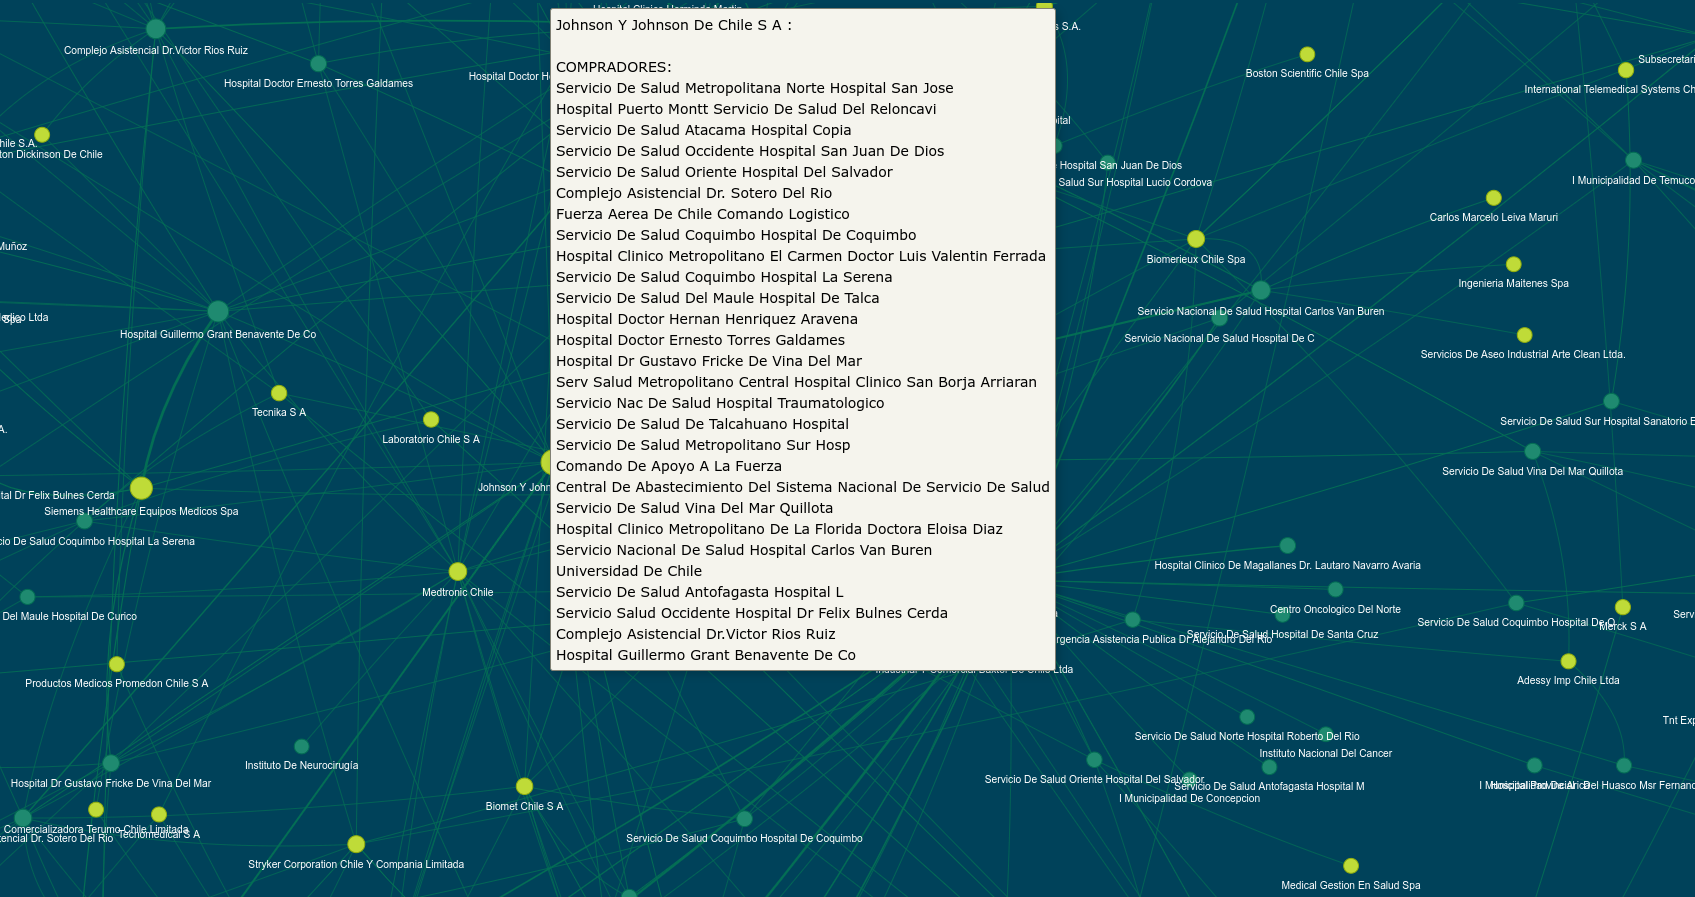

In [19]:
display(Image(filename='screenshots/2.png'))

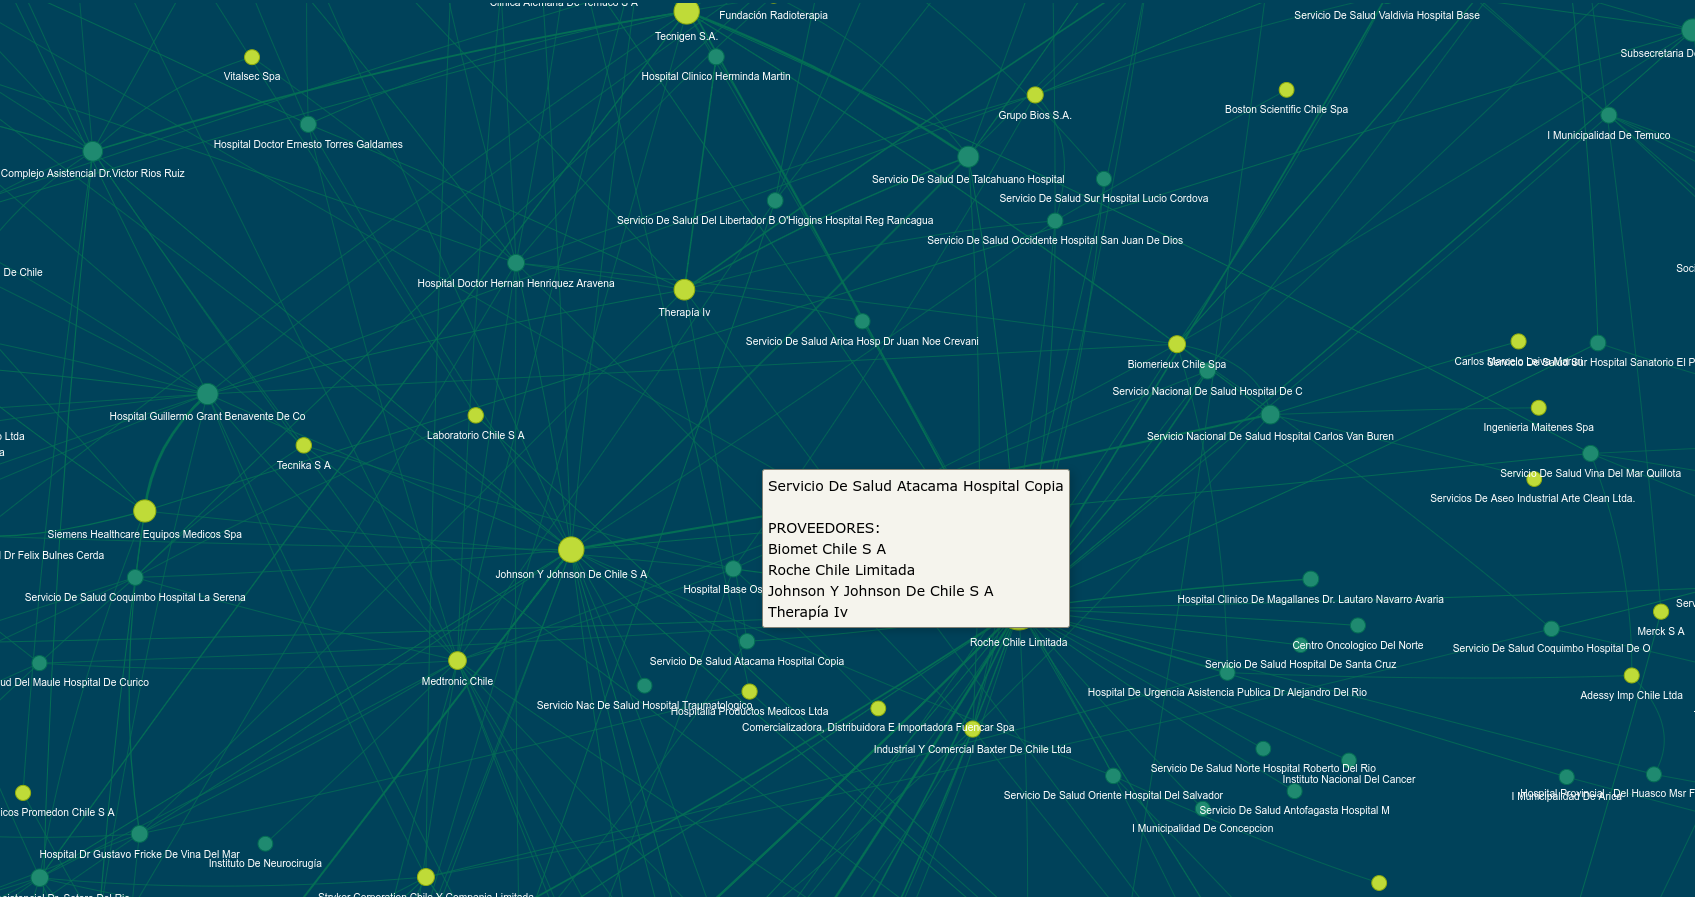

In [20]:
display(Image(filename='screenshots/3.png'))